<a href="https://colab.research.google.com/github/zeeiyerWork/LLM/blob/main/VehicleDataModule11_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In terms of Data Science/Engineering, the following Tasks need to be executed.
1.   **Data Loading and Basic Exploration:** Load Data File and execute basic exploration to understand columns, uniqueness of values etc.
2.   **Data Detailed Exploration:** Look for exceptions and opportunities to reduce complexity in terms of removal of columns altogether -> [Examine for high number of Nulls | Examine Values (high cardinality, single value] and drop these columns.
3.  **Data Preparation:** Add derived columns, Standardize/Transform Data, Impute data for missing values, Handle Categorical Columns
4.  **Model Building and Execution**: Feature Selection, Different Models, HyperParameters
4.  **Model Evaluation:** MSE, MAE, R2
5.  **Summarization:** Conclusions and next steps.






In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def dataframe_basicExploration(df):
    """
    Explores the DataFrame by:
    - Printing basic information using df.info()
    - Displaying descriptive statistics using df.describe()
    - Tabulating null/NaN values in each column using df.isnull().sum()
    - Plotting histograms for columns with cardinality < 64 (arbitrary) or a table with some frequent duplicate values
    - Plotting correlation matrix
    Args:
        df (pd.DataFrame): The DataFrame to explore.
    """

    print('Basic Information:\n')
    df.info()

    df_description = df.describe(include='all')
    print("\nDescriptive Statistics:")
    print(tabulate(df_description, headers='keys', tablefmt='fancy_grid'))

    # null counts
    df_null_values = df.isnull().sum()
    print(tabulate(df_null_values.reset_index().values.tolist(), headers=['Column', 'Null Count'], tablefmt='fancy_grid')) # Convert to list of lists

    print("\n HISTOGRAMS (for columns with cardinality < 64 (arbitrary)):")
    for col in df.columns:
        # Check for low cardinality (e.g., less than 64 unique values) - 64 is arbitrary
        if df[col].nunique() < 64:
            plt.figure(figsize=(12, 4))
            df[col].value_counts().plot(kind='bar')
            plt.title(f"Histogram of Unique Values for {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()
        else:
          if (df[col].dtype == 'object'):
            print(f"COLUMN '{col}' IS CATEGORICAL and HAS {df[col].nunique()} UNIQUE VALUES, skipping histogram and printing duplicate-value-count table where counts > 1000..")
            duplicates = df[col][df[col].duplicated(keep=False)]
            if not duplicates.empty:
              value_counts = duplicates.value_counts().reset_index()
              value_counts.columns = ['Value', 'Count']
              # Filter values with count greater than threshold
              filtered_counts = value_counts[value_counts['Count'] > 1000]
              if not filtered_counts.empty:
                print(f"\nColumn: {col}")
                print(tabulate(filtered_counts, headers='keys', tablefmt='fancy_grid'))
                print("-" * 150)
          else:
            plt.figure(figsize=(12, 4))
            plt.hist(df[col], bins=50)
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.title(f"Histogram of Binned Values for {col}")
            plt.show()

    print("\n CORRELATION MATRIX:")
    # Select only numerical columns for correlation calculation
    numerical_df = df.select_dtypes(include=['number'])
    correlation_matrix = numerical_df.corr()
    plt.figure(figsize=(10, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

In [2]:
import numpy as np
def dataframe_specificExploration(df):
    """
    Explores the DataFrame by:
    - Looking at specific correlations and group bys.
    - Clustering
    Args:
        df (pd.DataFrame): The DataFrame to explore.
    """

    # Apply log transformation to make price distribution more normal
    df['log_price'] = np.log1p(df['price'])
    sns.histplot(df['log_price'], bins=50, kde=True)
    plt.title("Price Distribution After Log Transformation")
    plt.show()

    # Apply log transformation to make odometer distribution more normal
    df['log_odometer'] = np.log1p(df['odometer'])
    sns.histplot(df['log_odometer'], bins=50, kde=True)
    plt.title("Mileage Distribution After Log Transformation")
    plt.show()

    # Preliminary algebraic analysis on Price (the target Variable)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='manufacturer', y='log_price', data=df)  # Box plot of price by manufacturer
    plt.xlabel('Manufacturer')
    plt.ylabel('Log(Price)')
    plt.title('Log(Price) Distribution by Manufacturer')
    plt.xticks(rotation=45)
    plt.show()

    # Groupby Analysis (Average Log-price by manufacturer)
    grouped_df = df.groupby('manufacturer')['log_price'].mean()
    print("\nAverage Log-Price by Manufacturer:")
    print(grouped_df)

    # Explore Feature Interactions (Example: Scatter plot of price vs. age)
    plt.figure(figsize=(8, 4))
    plt.scatter(df['year'], df['log_price'])
    plt.xlabel('Year')
    plt.ylabel('Log(Price)')
    plt.title('Log(Price) vs. Year')
    plt.show()

    # Explore Feature Interactions (Example: Scatter plot of Log(price) vs. Log(odometer)
    plt.figure(figsize=(8, 4))
    plt.scatter(df['log_odometer'], df['log_price'])
    plt.xlabel('Log(Odometer)')
    plt.ylabel('Log(Price)')
    plt.title('Log(Price) vs. Log(Odometer)')
    plt.show()

    # Investigate Outliers (Example: Box plot for price)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df['log_price'])
    plt.xlabel('Log(Price)')
    plt.title('Box Plot of Log(Price)')
    plt.show()

In [3]:
def drop_high_null_columns(df, threshold=50.0):
    """
    Drops columns with a null percentage higher than the given threshold.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    threshold (float): The null percentage threshold (default is 50.0).

    Returns:
    pd.DataFrame: A new DataFrame with the specified columns removed.
    """
    # Calculate the percentage of missing values per column
    null_percentage = (df.isnull().sum() / len(df)) * 100

    # Identify columns to drop
    cols_to_drop = null_percentage[null_percentage > threshold].index

    # Drop the columns
    df_cleaned = df.drop(columns=cols_to_drop)

    print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop} (more than {threshold}% missing values).")

    return df_cleaned

In [4]:
def drop_high_cardinality_after_null_removal(df, threshold=65.0):
    """
    Drops columns where the percentage of unique values (after removing nulls) exceeds the given threshold.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The percentage threshold for high cardinality (default is 65.0).

    Returns:
    pd.DataFrame: A new DataFrame with high-cardinality columns removed.
    """
    cardinality = {}

    for col in df.columns:
        non_null_values = df[col].dropna()  # Remove null values
        unique_percentage = (non_null_values.nunique() / len(non_null_values)) * 100 if len(non_null_values) > 0 else 0
        cardinality[col] = round(unique_percentage, 2)

    # Convert to DataFrame for visualization
    cardinality_df = pd.DataFrame(list(cardinality.items()), columns=['Column', 'Cardinality (%)'])
    cardinality_df_sorted = cardinality_df.sort_values(by="Cardinality (%)", ascending=False)
    # cardinality_df_sorted["Cardinality (%)"] = cardinality_df_sorted["Cardinality (%)"].round(2)

    # Identify columns to drop
    cols_to_drop = cardinality_df[cardinality_df["Cardinality (%)"] > threshold]["Column"].tolist()

    # Drop the columns
    df_cleaned = df.drop(columns=cols_to_drop)
    print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop} cardinality more than {threshold}% unique values after removing nulls).")

    return df_cleaned

In [5]:
def drop_single_value_columns(df):
    """
    Drops columns that contain only a single unique value after removing nulls.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A new DataFrame with constant columns removed.
    """
    cols_to_drop = [col for col in df.columns if df[col].dropna().nunique() == 1]

    # Drop the identified columns
    df_cleaned = df.drop(columns=cols_to_drop)
    print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop} columns with only one unique value after removing nulls).")

    return df_cleaned


In [6]:
from sklearn.impute import SimpleImputer

def smart_impute(df):
    """
    Improves imputation by using logical mappings and group-based most frequent values.

    Parameters:
    df (pd.DataFrame): The dataset to process.

    Returns:
    pd.DataFrame: The DataFrame with improved imputations.
    """
    # 1️⃣ Impute `manufacturer` based on `model`
    if 'manufacturer' in df.columns and 'model' in df.columns:
        model_to_manufacturer = df.groupby('model')['manufacturer'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
        df['manufacturer'] = df.apply(lambda row: model_to_manufacturer[row['model']] if pd.isnull(row['manufacturer']) and row['model'] in model_to_manufacturer else row['manufacturer'], axis=1)

    # 2️⃣ Impute `drive` based on `model`
    if 'drive' in df.columns and 'model' in df.columns:
        model_to_drive = df.groupby('model')['drive'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
        df['drive'] = df.apply(lambda row: model_to_drive[row['model']] if pd.isnull(row['drive']) and row['model'] in model_to_drive else row['drive'], axis=1)

    # 3️⃣ Impute `fuel` based on `model`
    if 'fuel' in df.columns and 'model' in df.columns:
        model_to_fuel = df.groupby('model')['fuel'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
        df['fuel'] = df.apply(lambda row: model_to_fuel[row['model']] if pd.isnull(row['fuel']) and row['model'] in model_to_fuel else row['fuel'], axis=1)

    # 4️⃣ Standard imputation for other categorical columns using mode (most frequent value)
    cat_imputer = SimpleImputer(strategy='most_frequent')
    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

    # 5️⃣ Impute numerical columns using median
    num_imputer = SimpleImputer(strategy='median')
    numerical_cols = df.select_dtypes(include=['number']).columns
    df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

    return df

Basic Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-nul

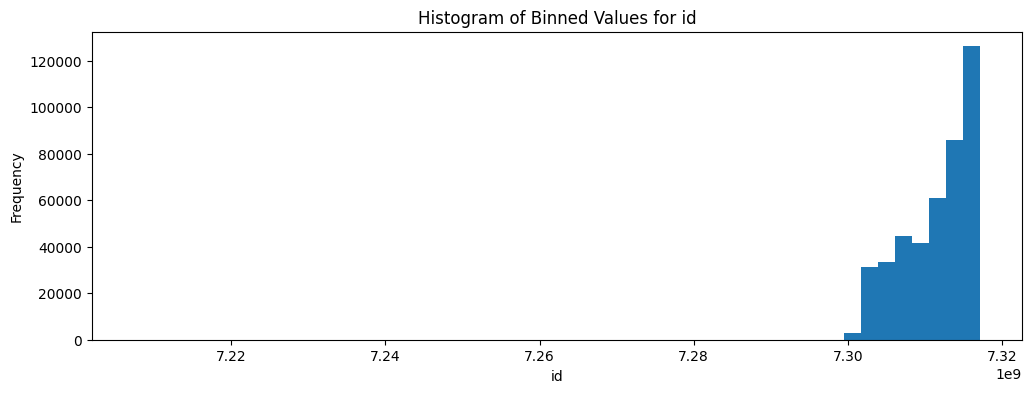

COLUMN 'region' IS CATEGORICAL and HAS 404 UNIQUE VALUES, skipping histogram and printing duplicate-value-count table where counts > 1000..

Column: region
╒═════╤══════════════════════════╤═════════╕
│     │ Value                    │   Count │
╞═════╪══════════════════════════╪═════════╡
│   0 │ columbus                 │    3608 │
├─────┼──────────────────────────┼─────────┤
│   1 │ jacksonville             │    3562 │
├─────┼──────────────────────────┼─────────┤
│   2 │ spokane / coeur d'alene  │    2988 │
├─────┼──────────────────────────┼─────────┤
│   3 │ eugene                   │    2985 │
├─────┼──────────────────────────┼─────────┤
│   4 │ fresno / madera          │    2983 │
├─────┼──────────────────────────┼─────────┤
│   5 │ orlando                  │    2983 │
├─────┼──────────────────────────┼─────────┤
│   6 │ bend                     │    2982 │
├─────┼──────────────────────────┼─────────┤
│   7 │ omaha / council bluffs   │    2982 │
├─────┼──────────────────────────┼

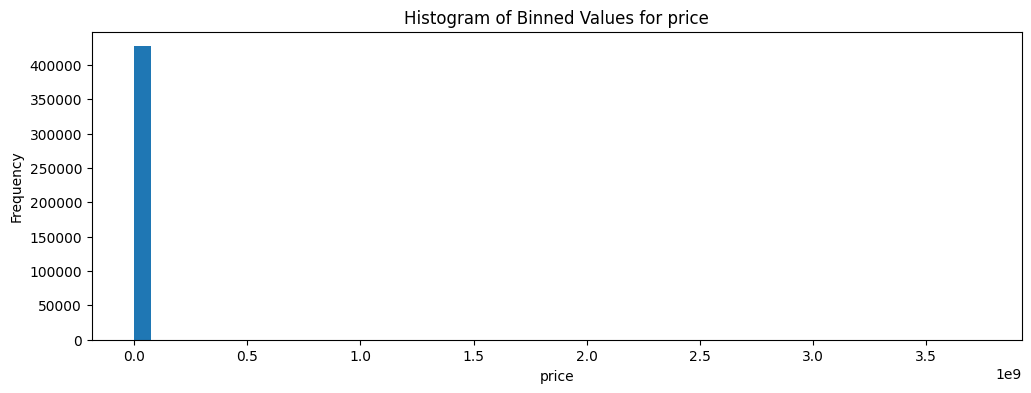

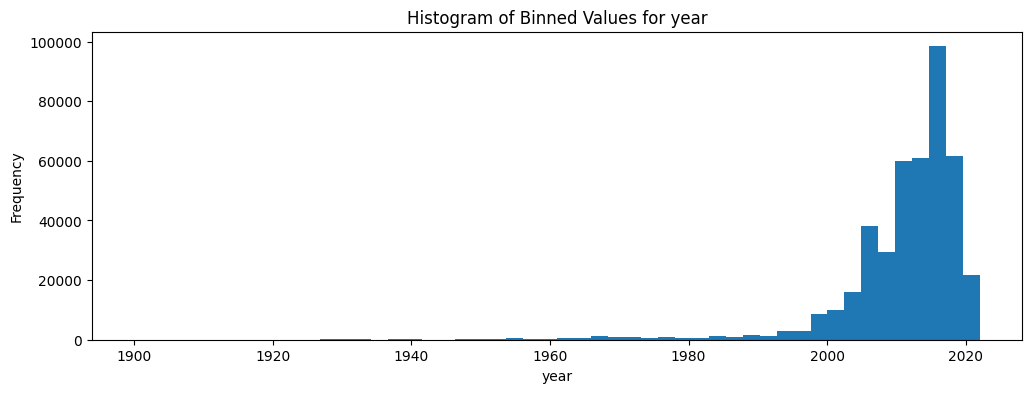

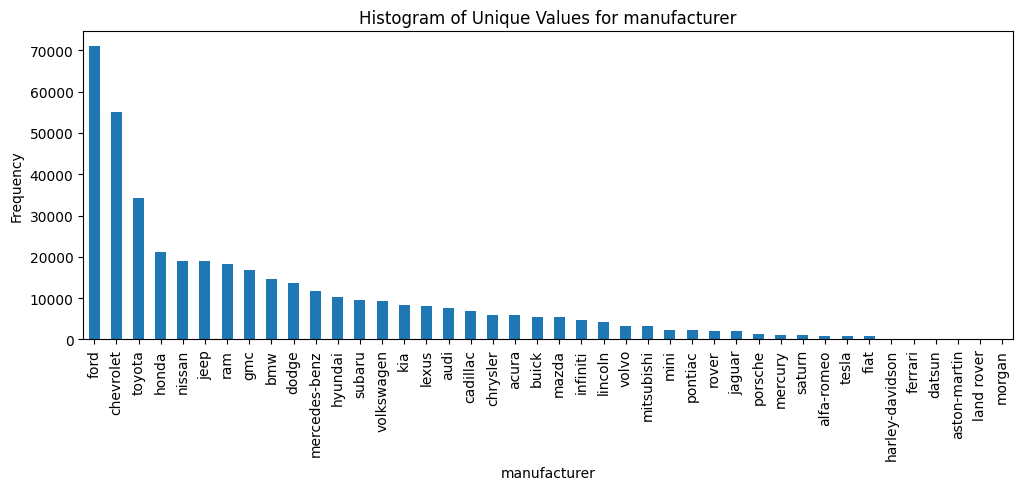

COLUMN 'model' IS CATEGORICAL and HAS 29649 UNIQUE VALUES, skipping histogram and printing duplicate-value-count table where counts > 1000..

Column: model
╒════╤════════════════════╤═════════╕
│    │ Value              │   Count │
╞════╪════════════════════╪═════════╡
│  0 │ f-150              │    8009 │
├────┼────────────────────┼─────────┤
│  1 │ silverado 1500     │    5140 │
├────┼────────────────────┼─────────┤
│  2 │ 1500               │    4211 │
├────┼────────────────────┼─────────┤
│  3 │ camry              │    3135 │
├────┼────────────────────┼─────────┤
│  4 │ silverado          │    3023 │
├────┼────────────────────┼─────────┤
│  5 │ accord             │    2969 │
├────┼────────────────────┼─────────┤
│  6 │ wrangler           │    2848 │
├────┼────────────────────┼─────────┤
│  7 │ civic              │    2799 │
├────┼────────────────────┼─────────┤
│  8 │ altima             │    2779 │
├────┼────────────────────┼─────────┤
│  9 │ escape             │    2746 │
├────┼──

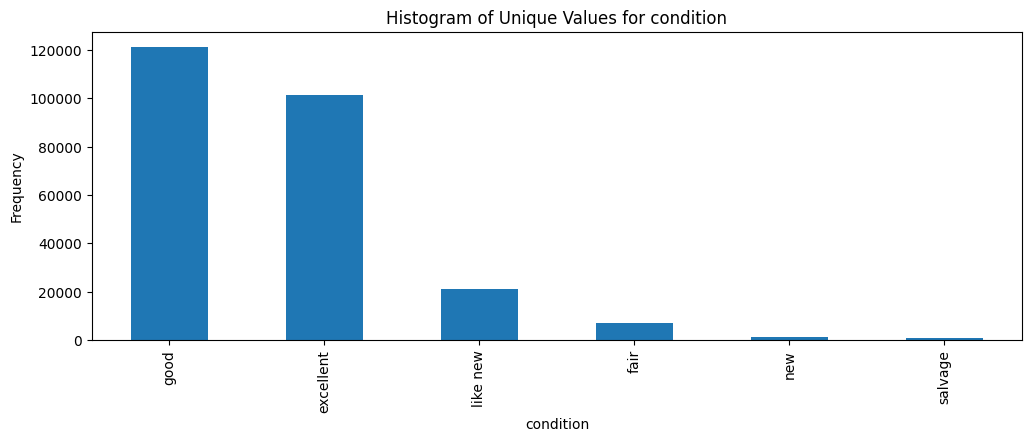

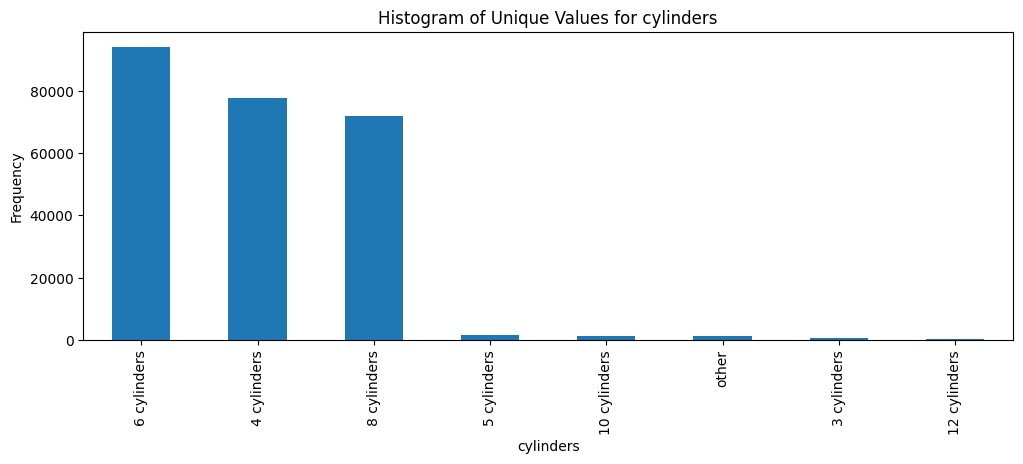

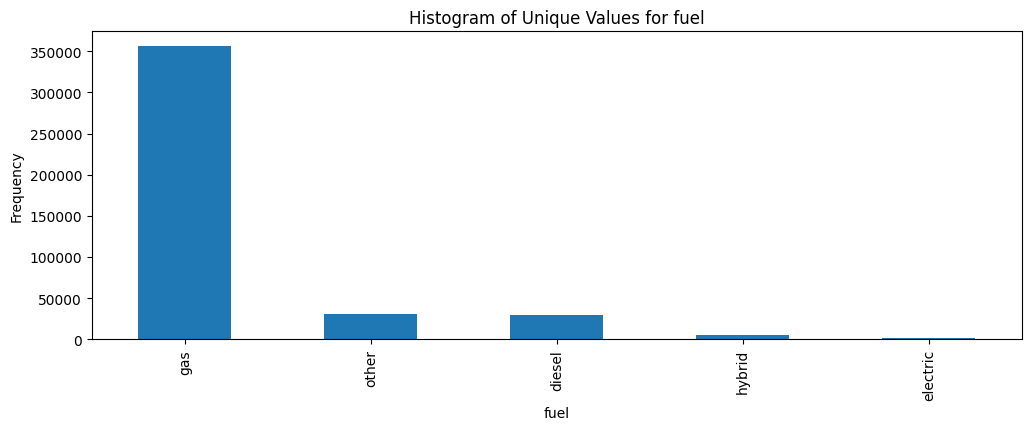

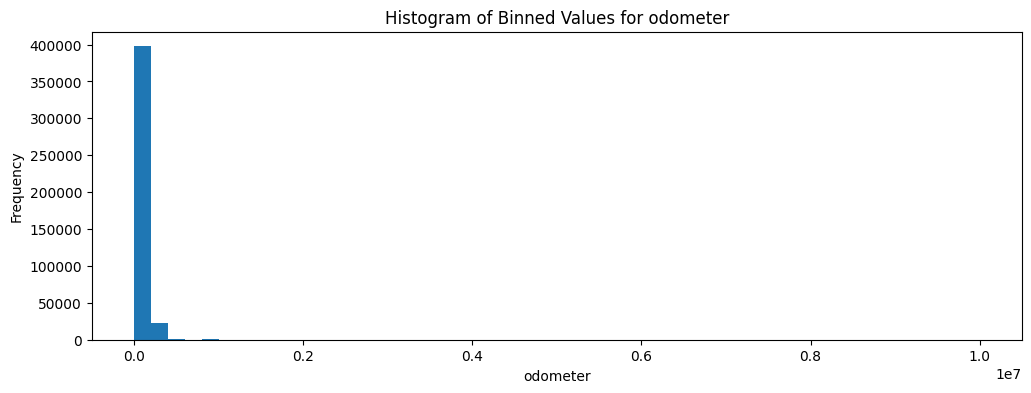

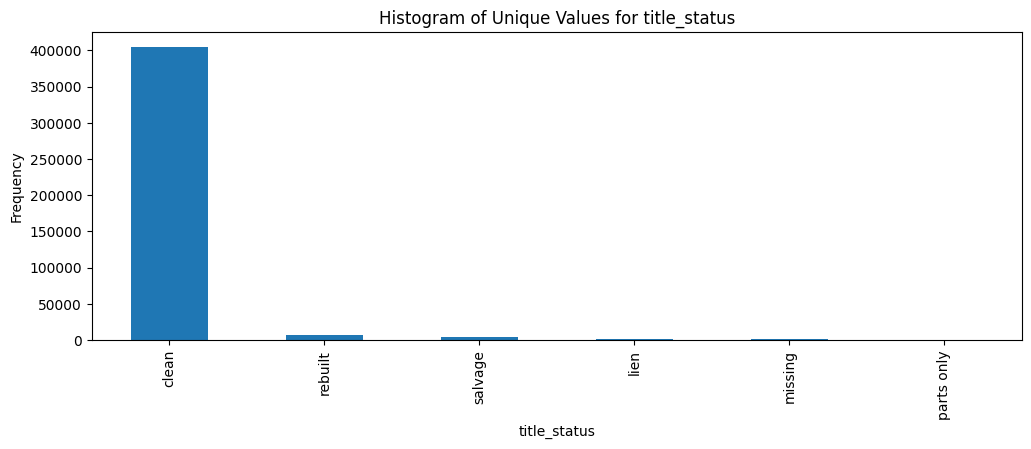

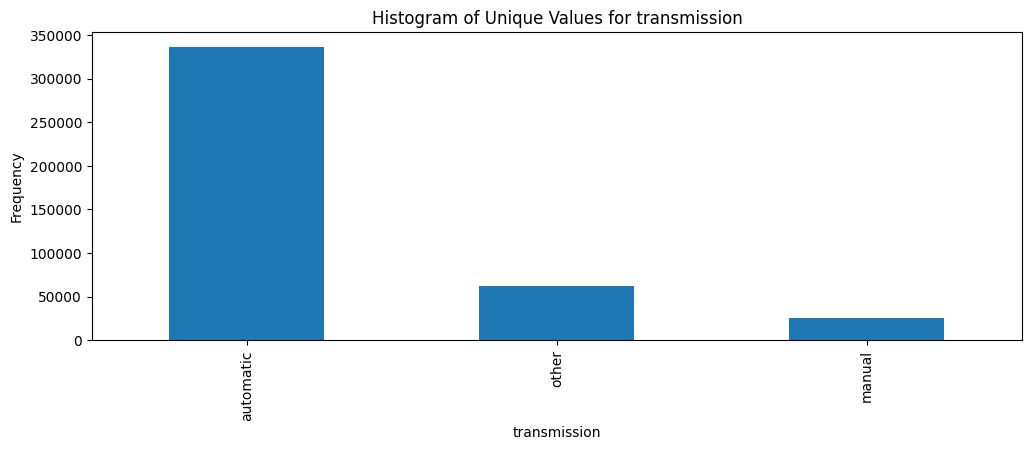

COLUMN 'VIN' IS CATEGORICAL and HAS 118246 UNIQUE VALUES, skipping histogram and printing duplicate-value-count table where counts > 1000..


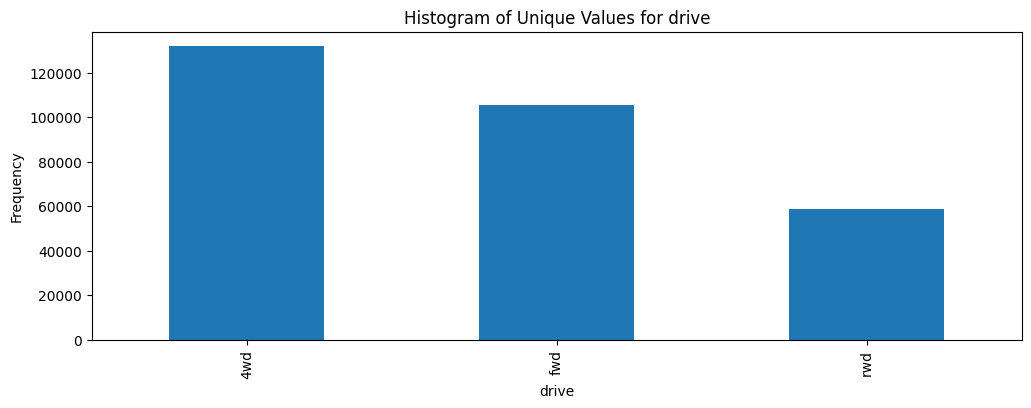

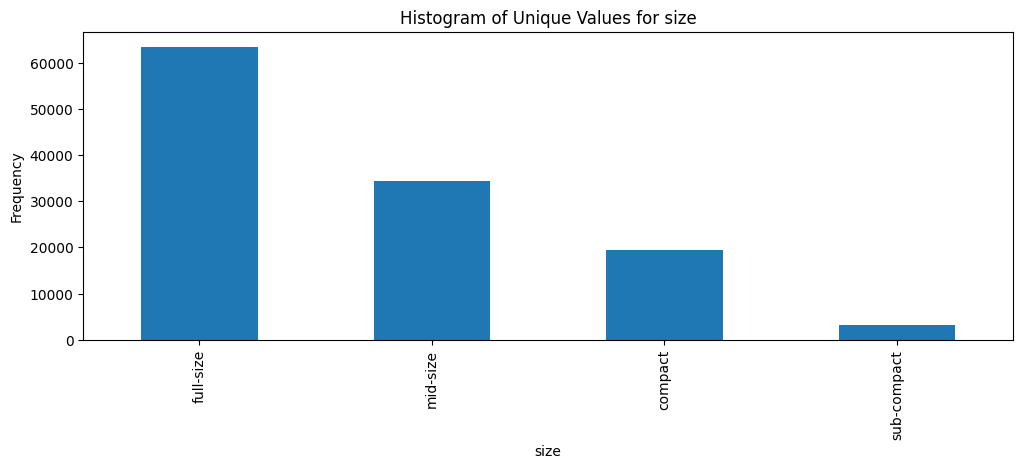

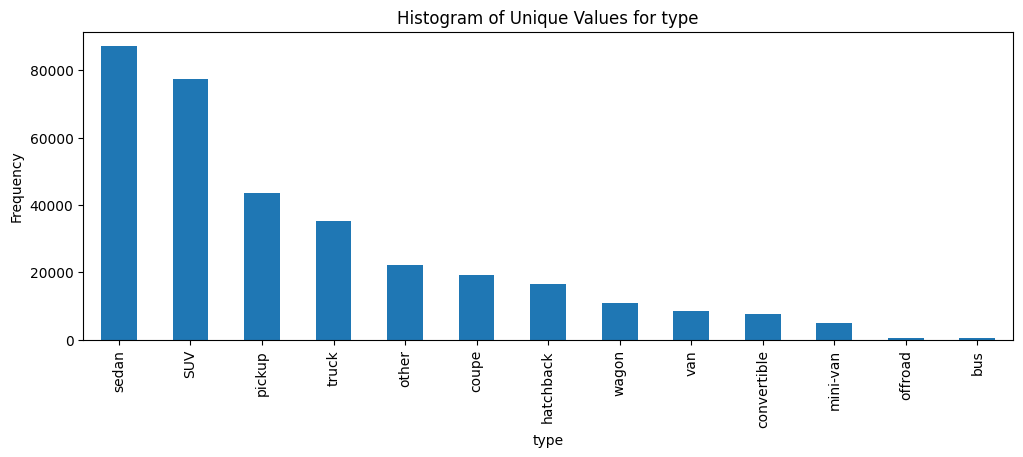

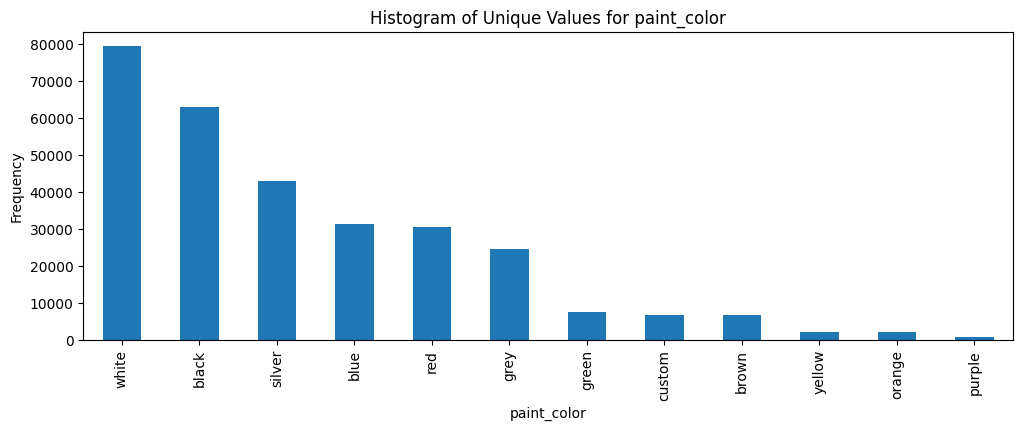

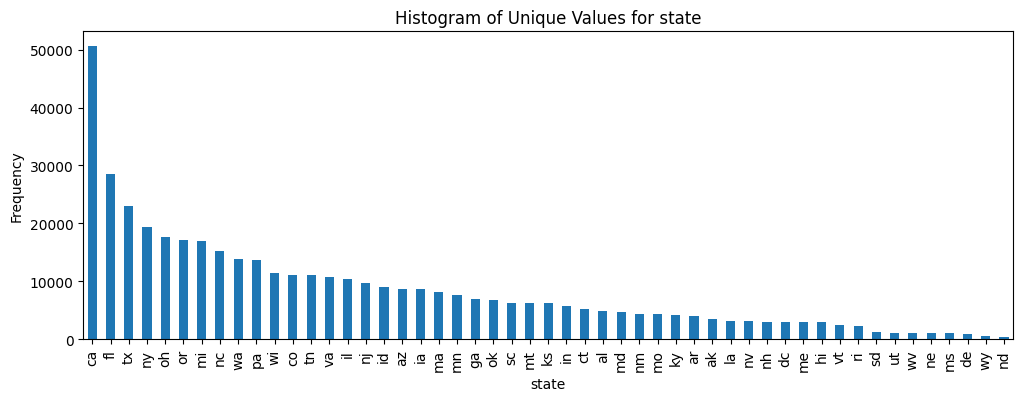


 CORRELATION MATRIX:


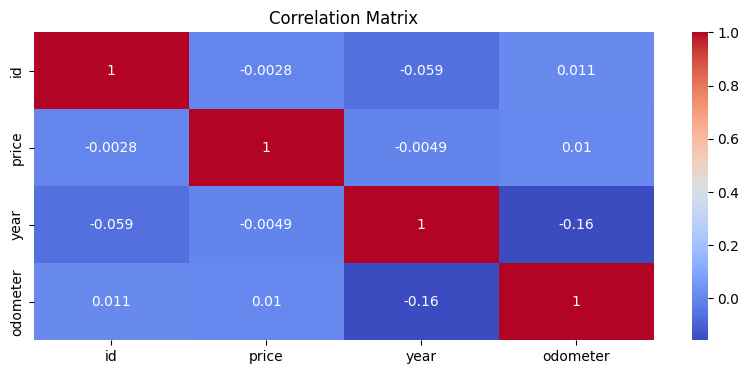

In [7]:
import pandas as pd
from tabulate import tabulate

# Load dataset (can be loaded as a relative path to the notebook - or be kept on the cloud and referenced with appropriate access control - chose latter)
file_path = "https://drive.google.com/uc?export=download&id=1Jb9L44k-VcKM6UIehEwGlrxklbBOFK3S"
df = pd.read_csv(file_path)
dataframe_basicExploration(df)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Based on basic exploration.
- Correlation Matrix: We basically see weak correlations. Add other derived columns like age of car, mileage/year etc.

- There are lots of columns with NULL values (while some can be imputed - we want to limit the amount of fake data since it could soon become a case of Garbage in/Garbage out. So, IMHO data problems should not be pushed under the carpet, therefore the recommendation is to drop all columns with a null count of > 35% (total rows = 426,880; so basically all coumns with more than 149,408 -> so columns: VIN, size, condition, cylinders).

- High Cardinality data coukld be dropped - VIN is anyway unique to each car and ID is too unique.

- These observations will be added to moreComplex Observations and then the data will be prepped suitably.

- Price and Odometer are all in 1 bin - so might have to transform - e.g. with Log(value)


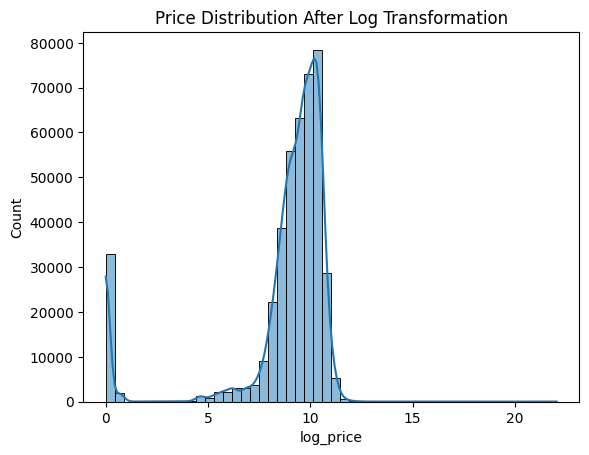

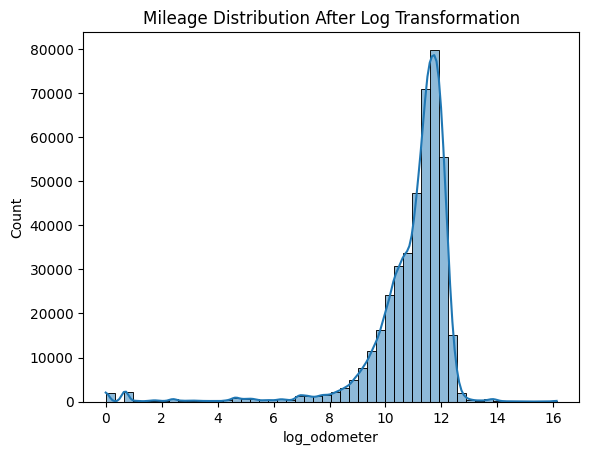

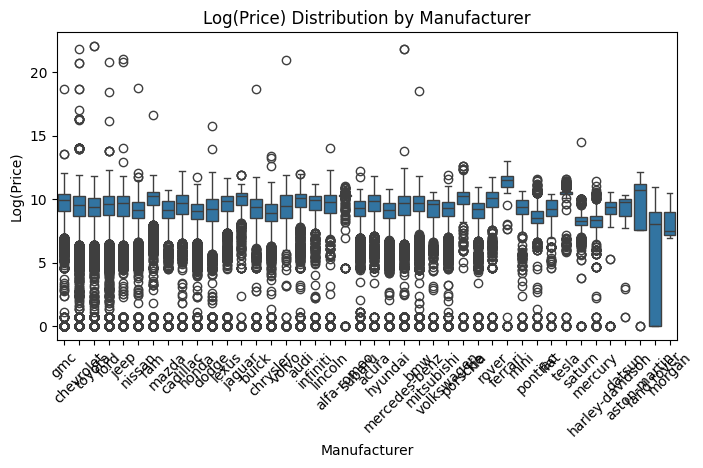


Average Log-Price by Manufacturer:
manufacturer
acura               9.166112
alfa-romeo          9.875525
aston-martin        9.131640
audi                9.294394
bmw                 8.927220
buick               8.699469
cadillac            9.017457
chevrolet           8.710779
chrysler            8.351153
datsun              8.975887
dodge               8.215927
ferrari             9.669340
fiat                8.845549
ford                8.725965
gmc                 8.995327
harley-davidson     8.425243
honda               8.411621
hyundai             8.232275
infiniti            9.009437
jaguar              9.688904
jeep                8.689314
kia                 8.128487
land rover          4.796014
lexus               9.072558
lincoln             9.172630
mazda               8.494820
mercedes-benz       8.449161
mercury             7.931043
mini                8.876778
mitsubishi          8.717296
morgan              8.303316
nissan              8.289896
pontiac             8.3

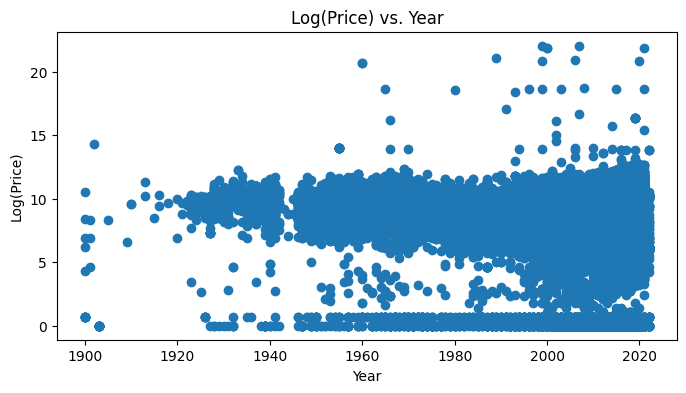

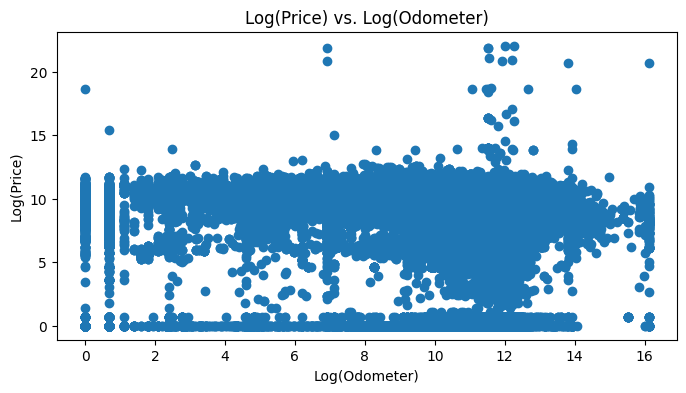

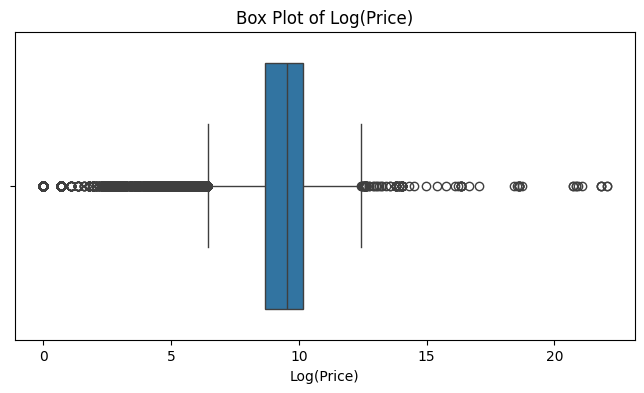

In [8]:
dataframe_specificExploration(df) # this also added log(Price) and log(Odometer) to dataframe

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`

Also includes feature selection.

In [9]:
def drop_rank_outliers(df, column, lower_quantile=0.01, upper_quantile=0.99):
    """
    Removes rows in 'df' where 'column' is outside the specified quantile range.

    Args:
        df (pd.DataFrame): The DataFrame to clean.
        column (str): The name of the numeric column to remove outliers from.
        lower_quantile (float): The lower quantile threshold (default=0.01).
        upper_quantile (float): The upper quantile threshold (default=0.99).

    Returns:
        pd.DataFrame: A new DataFrame without outliers in the specified column.
    """
    lower_bound = df[column].quantile(lower_quantile)
    upper_bound = df[column].quantile(upper_quantile)

    # Keep rows where the column value is within the bounds
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned


In [16]:

# Algorithmic dropping of columns due to data sparsity or high cardinality (hence less discriminatory) or single value
# Drop columns which have high cardinality (> 70% uniue)
df_cleaned = drop_high_cardinality_after_null_removal(df, threshold=70.0)
# Drop columns which have greater than 35% null values
df_cleaned = drop_high_null_columns(df_cleaned, threshold=35.0)
# Drop any columns that just have a single value
df_cleaned = drop_single_value_columns(df_cleaned)
# Drop columns based on MANUAL eyeballing - e.g. region is a subset of State and fair to assume that within a state pricing would remain constant.
df_cleaned = df_cleaned.drop(columns=['region'])


# Add New Features
df_cleaned['car_age'] = 2025 - df_cleaned['year']  # Age of car
df_cleaned['mileage_per_year'] = df_cleaned['odometer'] / (df_cleaned['car_age']) + 1 # Normalize mileage

# Work with logs of certain numeric features.
df_cleaned['log_price'] = np.log1p(df_cleaned['price'])
df_cleaned['log_mileage_per_year'] = np.log1p(df_cleaned['mileage_per_year'])

df_cleaned = df_cleaned.drop(columns=['price'])
df_cleaned = df_cleaned.drop(columns=['odometer']) # will use mileage_per_year instead.
df_cleaned = df_cleaned.drop(columns=['year']) # will use car_age instead.
df_cleaned = df_cleaned.drop(columns=['log_odometer'])
df_cleaned = df_cleaned.drop(columns=['mileage_per_year'])
#df_cleaned['log_odometer'] = np.log1p(df_cleaned['odometer'])

# Drop rows missing key values
print('Before1: ', len(df_cleaned))
df_cleaned.dropna(subset=['log_price', 'car_age', 'log_mileage_per_year'], inplace=True)
print('Before2: ', len(df_cleaned))
df_no_outliers = drop_rank_outliers(df_cleaned, column='log_price', lower_quantile=0.10, upper_quantile=0.90)
print('Before3: ', len(df_no_outliers))
df_no_outliers = drop_rank_outliers(df_no_outliers, column='car_age', lower_quantile=0.10, upper_quantile=0.90)
print('Before4: ', len(df_no_outliers))
df_no_outliers = drop_rank_outliers(df_no_outliers, column='log_mileage_per_year', lower_quantile=0.10, upper_quantile=0.90)
print('After: ', len(df_no_outliers))

# Do something about null/NaN values
df_cleaned_imputed = smart_impute(df_no_outliers)

#final cleaned table.
print(tabulate(df_cleaned_imputed[:100], headers='keys', tablefmt='fancy_grid'))

Dropped 1 columns: ['id'] cardinality more than 70.0% unique values after removing nulls).
Dropped 4 columns: Index(['condition', 'cylinders', 'VIN', 'size'], dtype='object') (more than 35.0% missing values).
Dropped 0 columns: [] columns with only one unique value after removing nulls).
Before1:  426880
Before2:  421344
Before3:  337219
Before4:  282188
After:  225750
╒═════╤════════════════╤════════════════════════════════╤════════╤════════════════╤════════════════╤═════════╤═════════════╤═══════════════╤═════════╤═════════════╤═══════════╤════════════════════════╕
│     │ manufacturer   │ model                          │ fuel   │ title_status   │ transmission   │ drive   │ type        │ paint_color   │ state   │   log_price │   car_age │   log_mileage_per_year │
╞═════╪════════════════╪════════════════════════════════╪════════╪════════════════╪════════════════╪═════════╪═════════════╪═══════════════╪═════════╪═════════════╪═══════════╪════════════════════════╡
│  27 │ gmc           

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Lots of Things to consider (perhaps use AutoML):
1. Features to use
2. Modelling to use
3. Hyper parameters to use
4. Scoring to use

In [17]:

# ----- Evaluation Function -----
def evaluate_model(y_train_pred, y_test_pred, y_train, y_test, model_name="Model"):
    results = {
        "Model": model_name,
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred),
    }
    return results


Numerical Cols:
 ['car_age', 'log_mileage_per_year']
Categorical Cols:
 ['manufacturer', 'transmission', 'model']
Finished Linear Regression - Degree 1
Finished Lasso
Finished XGB
Finished Random Forest Regressor
Testing Performance:
╒════════════════╤═════════════╤════════════╤══════════════╤═════════════╤════════════╤═══════════╕
│ Model          │   Train MAE │   Test MAE │   Train RMSE │   Test RMSE │   Train R² │   Test R² │
╞════════════════╪═════════════╪════════════╪══════════════╪═════════════╪════════════╪═══════════╡
│ Linear (Deg-1) │    0.186864 │   0.216466 │     0.327003 │    0.368211 │   0.805907 │  0.756889 │
├────────────────┼─────────────┼────────────┼──────────────┼─────────────┼────────────┼───────────┤
│ Lasso Train    │    0.337032 │   0.339954 │     0.480942 │    0.488555 │   0.580152 │  0.572006 │
├────────────────┼─────────────┼────────────┼──────────────┼─────────────┼────────────┼───────────┤
│ XGB            │    0.280843 │   0.287722 │     0.412398 │    0.

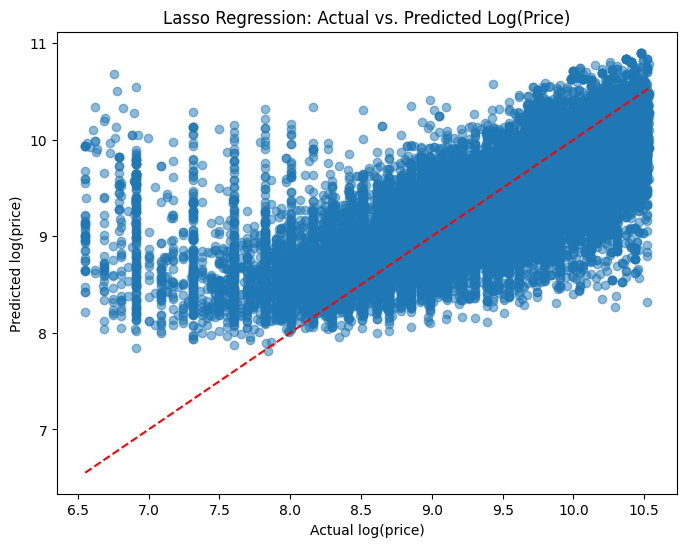

In [19]:
import pandas as pd
import numpy as np
import xgboost as xgb # Import the xgboost library and give it an alias 'xgb'
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor # Import the RandomForestRegressor class



# ----- Define Features and Target -----
important_features = ['manufacturer', 'transmission', 'model', 'car_age', 'log_mileage_per_year', 'log_price'] #based on corr matrix and data analysis.
df_selected = df_cleaned_imputed[important_features]
df_sample = df_selected.sample(frac=0.8, random_state=42)

# Identify numerical and categorical columns
categorical_cols = [col for col in df_selected.columns if df_selected[col].dtype == 'object' and col != 'log_price']
numerical_cols   = [col for col in df_selected.columns if df_selected[col].dtype != 'object' and col != 'log_price']
print('Numerical Cols:\n', numerical_cols)
print('Categorical Cols:\n', categorical_cols)

# Predictors and target variable
X = df_sample[numerical_cols + categorical_cols]
y = df_sample['log_price']

# ----- Preprocessing Pipeline -----
# Scale numerical features and one-hot encode categorical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ----- Build Model Pipelines -----
# 1. Baseline Linear Regression (Degree 1)
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linreg', LinearRegression())
])

# 2. Polynomial Regression (Degree 2) Pipeline
# poly_linreg_pipeline = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    # Generate polynomial features from preprocessed features
#    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
#    ('linreg', LinearRegression())
# ])

# 2. LassoCV Pipeline
alphas = np.logspace(-3, 1, 10) # 3) Define a custom alpha grid
# Use fewer folds, fewer alphas, and slightly higher tolerance
lasso_cv = LassoCV(
    alphas=alphas,
    cv=3,
    tol=1e-3,
    max_iter=1000,
    random_state=42
)

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', lasso_cv)
])

# Set up XGBoost model with early stopping
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb_model)
])

rfr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("randomforestregressor", RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42, n_jobs=1))  # Avoid threading issues
])




# ----- Train-Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Train the Models -----
# Linear Regression (Degree 1)
linreg_pipeline.fit(X_train, y_train)
y_train_pred_lin = linreg_pipeline.predict(X_train)
y_test_pred_lin = linreg_pipeline.predict(X_test)
print('Finished Linear Regression - Degree 1')
linreg_results = evaluate_model(y_train_pred_lin, y_test_pred_lin, y_train, y_test, "Linear (Deg-1)")

# Polynomial Regression (Degree 2)
#poly_linreg_pipeline.fit(X_train, y_train)
#y_train_pred_poly = poly_linreg_pipeline.predict(X_train)
#y_test_pred_poly = poly_linreg_pipeline.predict(X_test)
#print('Finished Linear Regression - Degree 2')

# Lasso Regression
lasso_pipeline.fit(X_train, y_train)
y_train_pred_lasso = lasso_pipeline.predict(X_train)
y_test_pred_lasso = lasso_pipeline.predict(X_test)
best_alpha = lasso_pipeline.named_steps['lasso'].alpha_
print('Finished Lasso')
lasso_results = evaluate_model(y_train_pred_lasso, y_test_pred_lasso, y_train, y_test, "Lasso Train")

xgb_pipeline.fit(X_train, y_train)
y_train_pred_xgb = xgb_pipeline.predict(X_train)
y_test_pred_xgb = xgb_pipeline.predict(X_test)
xgb_results = evaluate_model(y_train_pred_xgb, y_test_pred_xgb, y_train, y_test, "XGB")
print('Finished XGB')

rfr_pipeline.fit(X_train, y_train)
y_train_pred_rfr = rfr_pipeline.predict(X_train)
y_test_pred_rfr = rfr_pipeline.predict(X_test)
rfr_results = evaluate_model(y_train_pred_rfr, y_test_pred_rfr, y_train, y_test, "Random Forest")
print('Finished Random Forest Regressor')

model_results = [linreg_results, lasso_results, xgb_results, rfr_results]
print("Testing Performance:")
print(tabulate(model_results, headers='keys', tablefmt='fancy_grid'))

# ----- Visualize Actual vs Predicted for one model (e.g., Lasso) -----
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lasso, alpha=0.5)
plt.xlabel("Actual log(price)")
plt.ylabel("Predicted log(price)")
plt.title("Lasso Regression: Actual vs. Predicted Log(Price)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Below is an example of how you might **summarize and interpret** your current results, along with **actionable next steps** for both the **business** and **data science** teams. Feel free to adapt the tone and detail to your specific audience.

---

## **High-Level Summary**

- **What This Means for the Business (Data) **:  
  - **Used car prices are influenced by many factors** not fully captured in our current dataset (e.g., vehicle/accident history, detailed condition reports (e.g. seats, A/c working or not etc.), other local/broad economic conditions, brand reputation, seller negotiation strategies, aftermarket modifications,competitor listings). More effort is needed in the medium to long term to improve data set quality and scope.
  - With the data at hand, the models provide **limited predictive power**. However, they may still be **directionally useful** for broad trends (e.g., older cars with higher mileage typically have lower prices) or ball-park price.
  - in the short term we can also try a few model enhancements (Ridge instead of lasso, ensembles etc. etc.)

- **What This Means for the Business (Model) **:  
    - The **R² values** (ranging around 0.55–0.75) indicate that we could do better.  
  - **MAE** and **RMSE** suggest moderate errors in predicting the log of price, which translates into potentially large percentage errors in actual price terms.
  - Given the current R² scores and error metrics, the models **cannot yet provide highly accurate price predictions**. However, they do offer some insights:
  - **Car age and mileage** consistently emerge as key drivers of price.  
  - **Manufacturer** and **transmission** type also show some influence, though additional data could clarify their impact.

In short, **the journey to a high R²** for used car pricing often requires **both** better data and more sophisticated modeling.